In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!python --version

Python 3.11.13


In [3]:
!pip install ultralytics --upgrade

  Using cached ultralytics-8.3.176-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.176-py3-none-any.whl (1.0 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


In [4]:
from ultralytics import YOLO

In [5]:
!wget -P -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt

--2025-08-09 11:35:47--  https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/THU-MIG/yolov10/releases/download/v1.0/yolov10n.pt [following]
--2025-08-09 11:35:47--  https://github.com/THU-MIG/yolov10/releases/download/v1.0/yolov10n.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/804788522/de01476f-8157-4901-921f-e0c6cb3848cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-09T12%3A33%3A42Z&rscd=attachment%3B+filename%3Dyolov10n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-09T11%3A33%3A13Z&ske=2025-08-09T12%3A33%3A42Z&sks=b&skv=2018-11-09&si

In [6]:
!pip install -q roboflow

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key = "Nsffuua6T7D0oYRU6oYL")
project = rf.workspace("brain-mri").project("mri-rskcu")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [8]:
model = YOLO('yolov8n.pt')

In [9]:
model.train(data='/content/MRI-3/data.yaml',epochs =25)

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/MRI-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

train: Scanning /content/MRI-3/train/labels.cache... 852 images, 0 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 972.0±617.8 MB/s, size: 69.4 KB)


val: Scanning /content/MRI-3/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.03G      1.565      2.951      1.626          7        640: 100%|██████████| 54/54 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        151        178      0.887      0.203      0.305      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.52G      1.447      2.142      1.486         10        640: 100%|██████████| 54/54 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]


                   all        151        178      0.638      0.342      0.367      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.52G      1.426      1.839      1.451         13        640: 100%|██████████| 54/54 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        151        178      0.632      0.484      0.518      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.52G      1.446      1.653      1.477          7        640: 100%|██████████| 54/54 [00:14<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        151        178      0.614      0.663      0.614      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.52G      1.425      1.595      1.498         12        640: 100%|██████████| 54/54 [00:14<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        151        178       0.42      0.611      0.513      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.52G      1.397      1.419      1.479          8        640: 100%|██████████| 54/54 [00:15<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]


                   all        151        178      0.904      0.679      0.781      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.52G      1.394      1.356      1.468          5        640: 100%|██████████| 54/54 [00:15<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

                   all        151        178      0.824      0.699      0.745      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.52G      1.358       1.27      1.418          8        640: 100%|██████████| 54/54 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]


                   all        151        178      0.938      0.686      0.794      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.52G       1.31      1.167        1.4          7        640: 100%|██████████| 54/54 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]

                   all        151        178      0.886      0.642      0.774      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.52G      1.287      1.136      1.379          6        640: 100%|██████████| 54/54 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        151        178      0.848      0.762      0.812      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.53G      1.287      1.137      1.385          3        640: 100%|██████████| 54/54 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        151        178       0.94      0.719      0.809      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.53G      1.271        1.1      1.355          7        640: 100%|██████████| 54/54 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]

                   all        151        178      0.829      0.788      0.863      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.53G      1.265      1.041       1.36          5        640: 100%|██████████| 54/54 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all        151        178      0.962      0.787      0.865      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.55G      1.234     0.9878      1.345         12        640: 100%|██████████| 54/54 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all        151        178      0.902      0.753      0.862      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.55G      1.227     0.9552      1.341          8        640: 100%|██████████| 54/54 [00:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        151        178      0.919      0.823      0.874      0.578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.55G      1.136     0.7711      1.295          4        640: 100%|██████████| 54/54 [00:14<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all        151        178      0.935      0.761      0.854       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.55G      1.098     0.7495      1.286          4        640: 100%|██████████| 54/54 [00:14<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        151        178      0.852      0.791      0.873      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.55G      1.078       0.68      1.263          4        640: 100%|██████████| 54/54 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

                   all        151        178      0.949      0.798      0.883       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.57G      1.061     0.6699      1.256          4        640: 100%|██████████| 54/54 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        151        178      0.887      0.834       0.88      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.57G      1.031      0.644       1.24          6        640: 100%|██████████| 54/54 [00:13<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all        151        178      0.934      0.835      0.891      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.57G     0.9938     0.6022      1.198          7        640: 100%|██████████| 54/54 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]

                   all        151        178      0.968      0.828      0.918      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.58G     0.9719     0.5729      1.184          4        640: 100%|██████████| 54/54 [00:13<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all        151        178       0.93      0.854        0.9      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.58G     0.9669     0.5658      1.189          4        640: 100%|██████████| 54/54 [00:13<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        151        178       0.95      0.818      0.891      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.58G     0.9387     0.5414      1.177          6        640: 100%|██████████| 54/54 [00:13<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        151        178      0.906      0.857      0.901      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.58G     0.9374     0.5295      1.172          6        640: 100%|██████████| 54/54 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        151        178      0.937      0.844        0.9      0.614



25 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


                   all        151        178      0.937      0.845        0.9      0.615
           Brain-Tumor        151        155      0.928      0.912      0.964      0.675
                   eye         15         23      0.947      0.778      0.835      0.556
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78eecf14fd50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [12]:
!pip install ultralytics

In [13]:
from ultralytics import YOLO

In [14]:
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

In [15]:
results = model.predict(
    source="/content/MRI-3/valid/images",  # folder or file
    conf=0.25,                             # confidence threshold
    save=True                              # save output images
)


image 1/151 /content/MRI-3/valid/images/Tr-glTr_0000_jpg.rf.ee4ad3ca5d0eafd1f482988b89457634.jpg: 640x640 1 Brain-Tumor, 32.7ms
image 2/151 /content/MRI-3/valid/images/Tr-gl_0021_jpg.rf.82e37d9cdf73ab894e8af3cd4bfb70a8.jpg: 640x640 1 Brain-Tumor, 16.7ms
image 3/151 /content/MRI-3/valid/images/Tr-gl_0119_jpg.rf.0768b25ee8d4e0aa20df53673dce853e.jpg: 640x640 2 Brain-Tumors, 15.1ms
image 4/151 /content/MRI-3/valid/images/Tr-gl_0228_jpg.rf.b9ecef834d39f770e41b0585b63bdc1a.jpg: 640x640 (no detections), 9.2ms
image 5/151 /content/MRI-3/valid/images/Tr-gl_0342_jpg.rf.10e62693351dae5f8b8f0e136c8ec8c3.jpg: 640x640 2 eyes, 12.5ms
image 6/151 /content/MRI-3/valid/images/Tr-gl_0493_jpg.rf.4393a755ad877b333ee635f7d8625687.jpg: 640x640 1 Brain-Tumor, 14.3ms
image 7/151 /content/MRI-3/valid/images/Tr-gl_0565_jpg.rf.4975825d65539d7d35caf0f61517f236.jpg: 640x640 1 Brain-Tumor, 16.1ms
image 8/151 /content/MRI-3/valid/images/Tr-gl_0585_jpg.rf.eeb0b7c0f19a6763494b9e53fee546db.jpg: 640x640 1 Brain-Tumor, 3

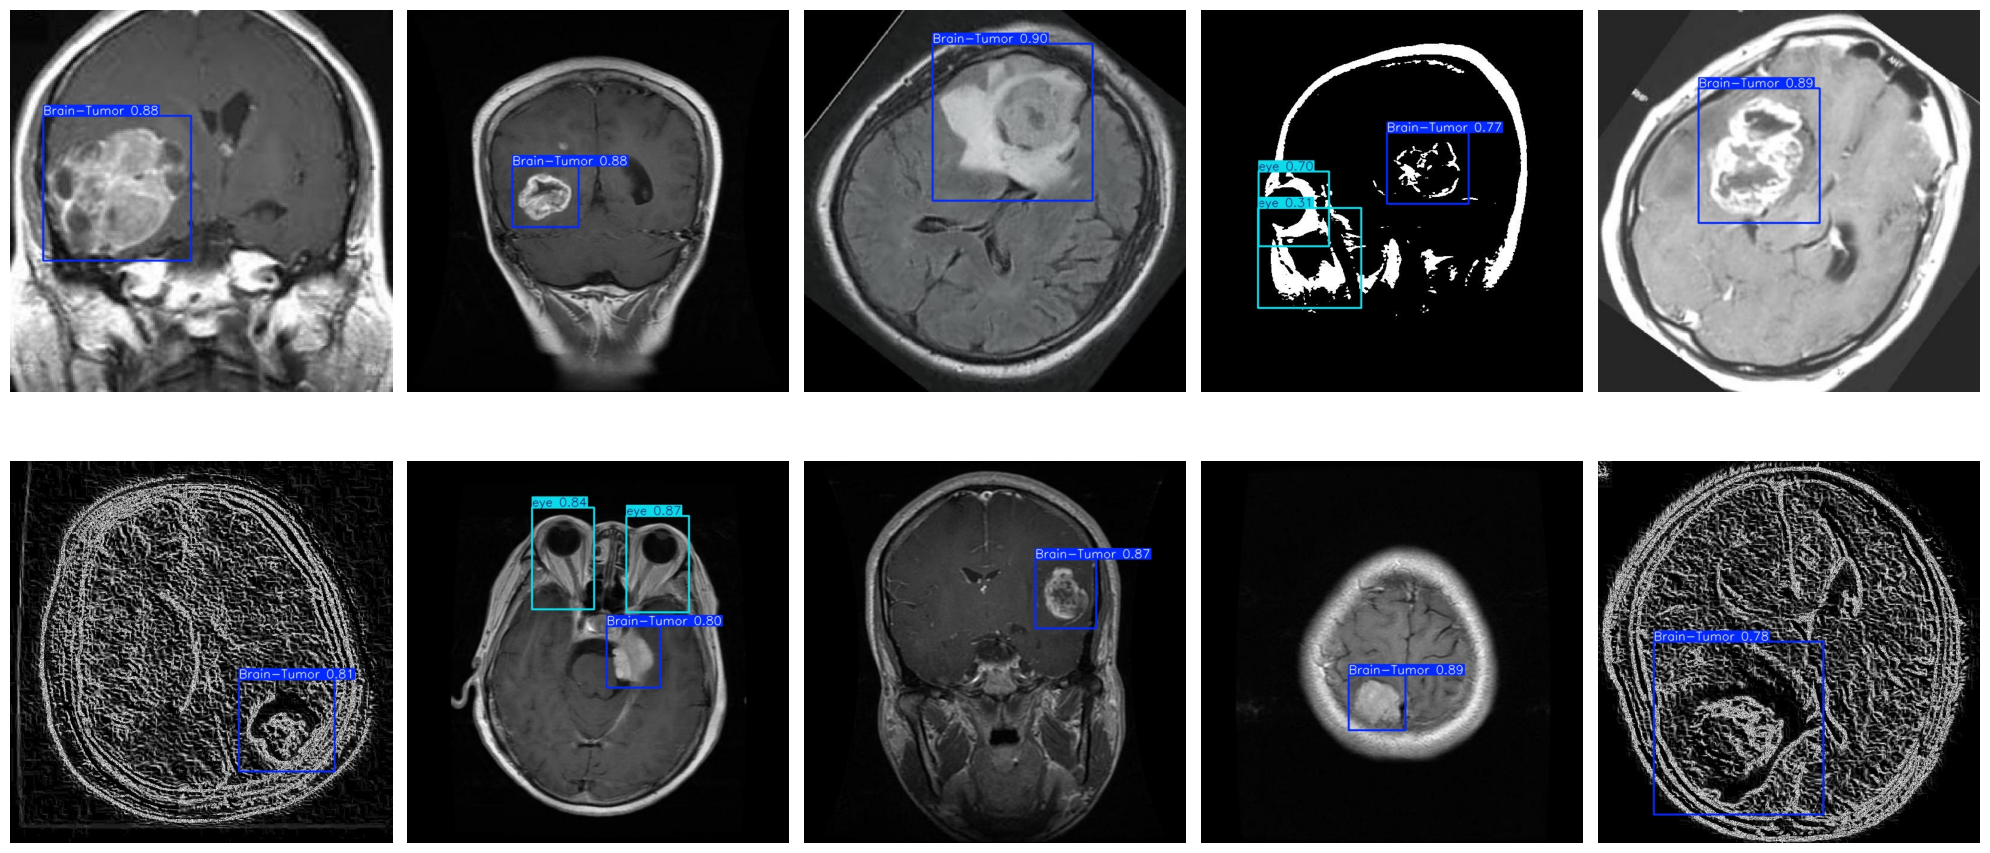

In [16]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob("/content/runs/detect/predict/*.jpg")

images_to_display = images[:10]

fig, axes = plt.subplots(2,5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
  if i < len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis('off')
  else:
    ax.axis('off')
plt.tight_layout()
plt.show()


image 1/1 /content/MRI-3/valid/images/Tr-glTr_0000_jpg.rf.ee4ad3ca5d0eafd1f482988b89457634.jpg: 640x640 1 Brain-Tumor, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
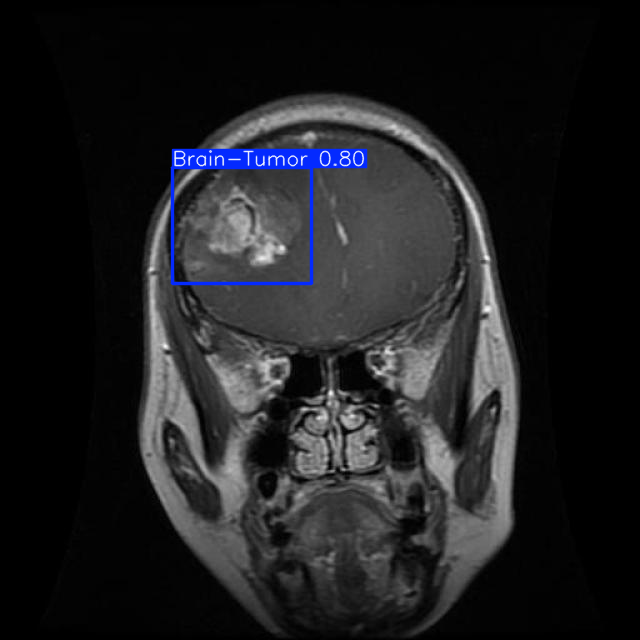

In [17]:
result = model.predict(source = "/content/MRI-3/valid/images/Tr-glTr_0000_jpg.rf.ee4ad3ca5d0eafd1f482988b89457634.jpg", imgsz = 640, conf = 0.25)
annotated_img = result[0].plot()
annotated_img[:, :, ::-1]

In [1]:
!pip install gradio

In [2]:
import gradio as gr
import cv2
import numpy as np

def predict(image):
  result = model.predict(source=image, imgsz = 640, conf = 0.25)
  annotated_img = result[0].plot()
  annotated_img = annotated_img[:, :, ::-1]
  return annotated_img

app = gr.Interface(
    fn =predict,
    inputs = gr.Image(type="numpy", label="Upload an image"),
    outputs = gr.Image(type="numpy", label="Detect Brain Tumor"),
    title = "Brain Tumor Detection Using Yolov10",
    description="Upload an image and the yolov10 model will detect and annotated brain tumor"
)

app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3b27410fa05e1c91e1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
